In [10]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [1]:
from fastai.imports import *
from fastai.text import *
from fastai import *
from pathlib import Path
import numpy as np
import pandas as pd
import html
import sklearn

C:\ProgramData\Anaconda3\envs\py36\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Pool size changed, may indicate binary incompatibility. Expected 48 from C header, got 64 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\envs\py36\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Address size changed, may indicate binary incompatibility. Expected 24 from C header, got 40 from PyObject
  return f(*args, **kwds)


## Language model

In [2]:
LMPath = Path('C:/Jupyter/LM')

In [3]:
data_lm = TextLMDataBunch.from_csv(path=LMPath,train='train',valid='test',bs=8)

In [4]:
learn = RNNLearner.language_model(data_lm,pretrained_fnames=['lstm_wt103','itos_wt103'],drop_mult=0.5)

In [ ]:
learn.fit_one_cycle(1, 1e-2)
learn.save('frozen')

In [ ]:
learn.load('frozen')
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(1,1e-3)
learn.save('unfrozen')

In [ ]:
learn.load('unfrozen')
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(1,1e-3)
learn.save('unfrozen')

In [ ]:
learn.save_encoder('lm_enc')

## Classification

In [4]:
ClassPath = Path('C:/Jupyter/Class')
TrainDF = pd.read_csv(ClassPath/'train.csv', header=None)
TestDF = pd.read_csv(ClassPath/'test.csv', header=None)
Classes = ['neg','pos']

In [5]:
data_clas = TextClasDataBunch.from_df(path=ClassPath,train_df=TrainDF,valid_df=TestDF,vocab=data_lm.train_ds.vocab
                                      ,bs=8,classes=Classes,n_labels=1)

Numericalizing train.
Numericalizing valid.


In [6]:
learnClass = RNNLearner.classifier(data_clas, drop_mult=0.5)

In [7]:
learnClass.load_encoder('lm_enc')

In [16]:
learnClass.fit_one_cycle(1, 1e-2)

Total time: 2:06:06
epoch  train loss  valid loss  accuracy
1      0.468759    0.265416    0.909960  (2:06:06)



In [8]:
learnClass.save('frozen')

In [7]:
learnClass.load('frozen')

In [9]:
learnClass.lr_find()

RuntimeError: CUDA error: out of memory

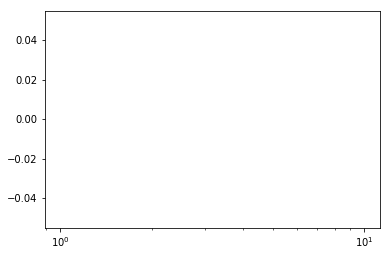

In [13]:
learnClass.recorder.plot()

In [8]:
learnClass.freeze_to(-2)
learnClass.fit_one_cycle(1, slice(1e-4, 1e-3))
learnClass.save('unfrozen2')

Total time: 1:01:26
epoch  train loss  valid loss  accuracy
1      0.412202    0.237089    0.922560  (1:01:26)



In [7]:
learnClass.load('unfrozen2')

In [9]:
learnClass.unfreeze()
learnClass.fit_one_cycle(5, slice(2e-3/100, 2e-3))
learnClass.save('unfrozen')

RuntimeError: CUDA error: out of memory